In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('E:\datascience\Automobile_insurance_fraud.csv')

In [3]:
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
data.shape

(1000, 40)

In [5]:
data.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [6]:
data=data.drop(columns=['_c39'])

In [7]:
data.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


<AxesSubplot:>

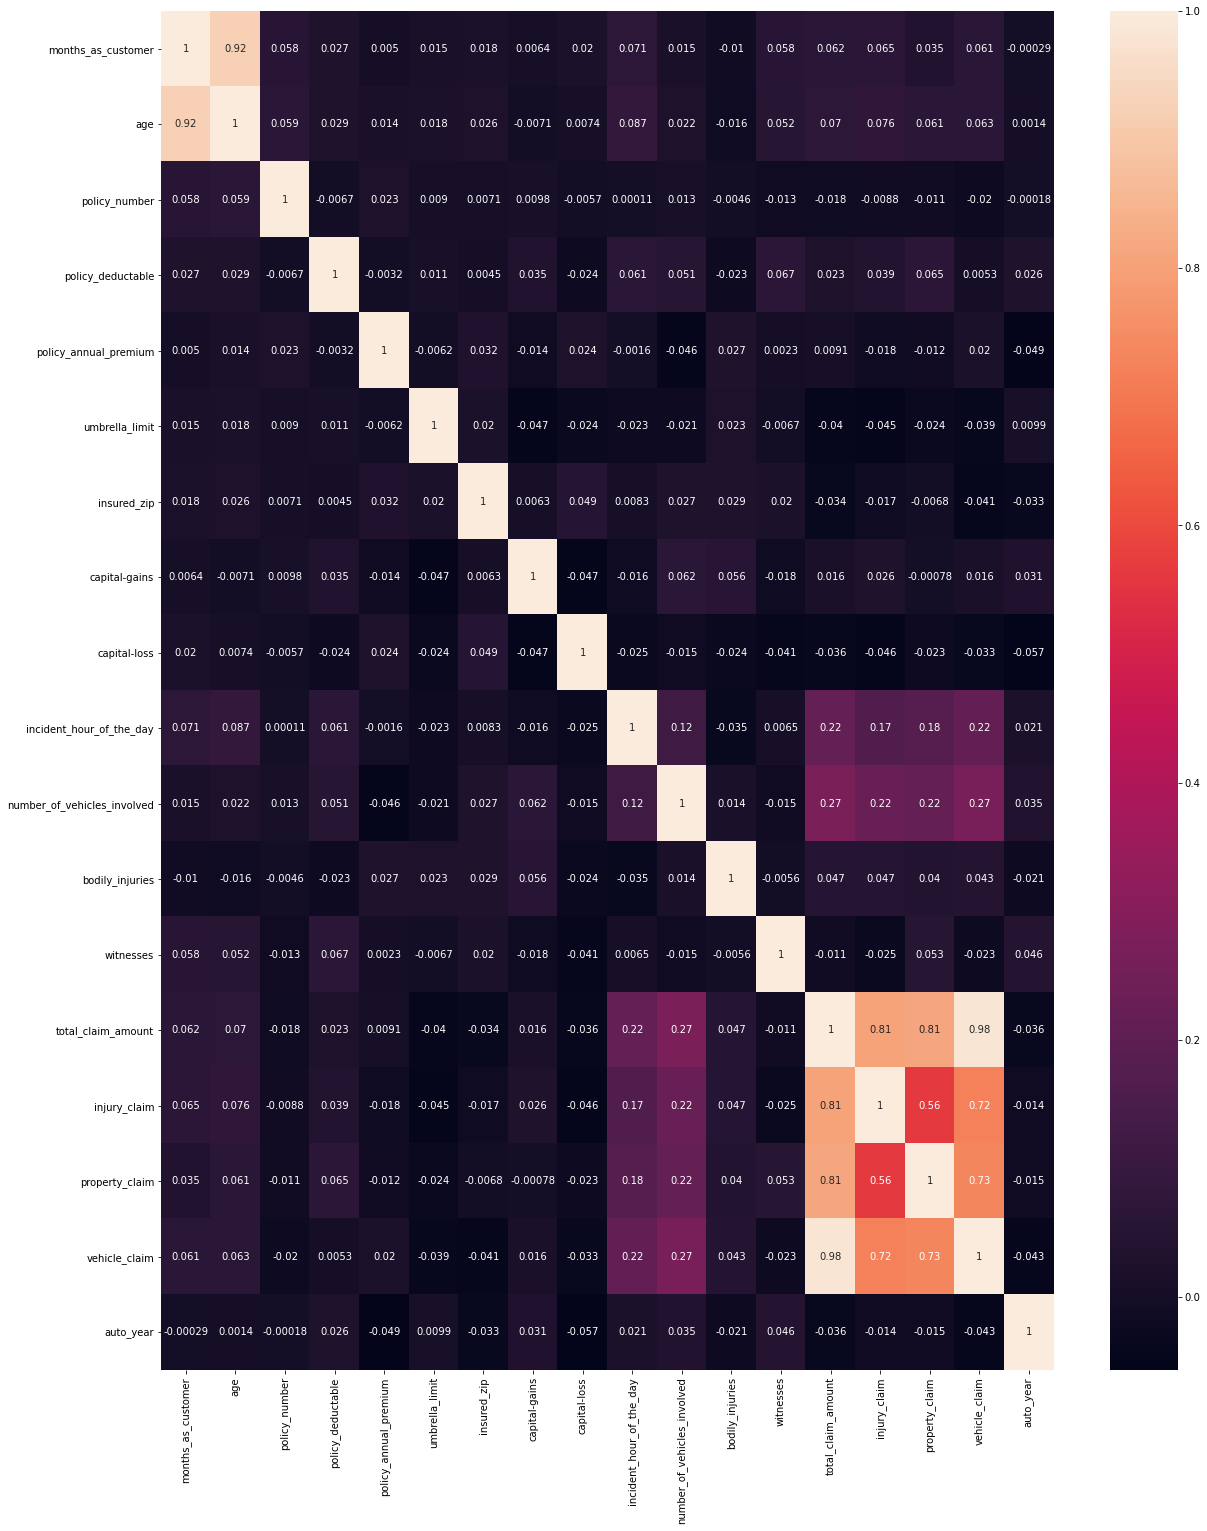

In [8]:
plt.figure(figsize=(20,25))
sns.heatmap(data.corr(), annot=True)

In [9]:
data=data.drop(columns=['policy_bind_date'])

In [10]:
data=data.drop(columns=['incident_date'])

In [11]:
data=data.drop(columns=['insured_hobbies'])

In [46]:
data['property_damage'].fillna('?',inplace=True)

In [47]:
data['police_report_available'].fillna('?',inplace=True)

In [48]:
data['collision_type'].fillna('?',inplace=True)

In [20]:
data=data.drop(columns=['auto_make'])

In [21]:
data=data.drop(columns=['auto_model'])

In [22]:
ohe=OneHotEncoder()
si=SimpleImputer()

In [23]:
ct=make_column_transformer((ohe,['insured_sex','insured_education_level','insured_occupation','insured_relationship','incident_type','collision_type','incident_severity','authorities_contacted','incident_state','incident_city','number_of_vehicles_involved','property_damage','police_report_available','fraud_reported'])),(si,['property_damage','police_report_available'])

In [24]:
for i in data.columns:
    if data[i].dtypes=='object':
        print(i)
        data[i]=[ct.fit_transform(data[i])]

policy_state


AttributeError: 'tuple' object has no attribute 'fit_transform'

In [25]:
encoded=ct.fit_transform

AttributeError: 'tuple' object has no attribute 'fit_transform'

In [26]:
data['policy_state']=data['policy_state'].replace({'OH':0,'IN':1,'IL':2})
data['policy_csl']=data['policy_csl'].replace({'100/300':0,'250/500':1,'500/1000':2})
data['insured_sex']=data['insured_sex'].replace({'MALE':0,'FEMALE':1})
data['insured_education_level']=data['insured_education_level'].replace({'High School':0,'College':1,'Associate':2,'Masters':3,'JD':4,'MD':5,'PhD':6})
data['insured_occupation']=data['insured_occupation'].replace({'craft-repair':0,'machine-op-inspct':1,'sales':2,'armed-forces':3,'tech-support':4,'prof-specialty':5,'other-service':6,'priv-house-serv':7,'exec-managerial':8,'protective-serv':9,'adm-clerical':10,'farming-fishing':11,'handlers-cleaners':12,'transport-moving':13,})
data['insured_relationship']=data['insured_relationship'].replace({'husband':0,'wife':1,'own-child':2,'other-relative':3,'unmarried':4,'not-in-family':5})
data['incident_type']=data['incident_type'].replace({'Multi-vehicle Collision':0,'Single Vehicle Collision':1,'Parked Car':2,'Vehicle Theft':3})
data['collision_type']=data['collision_type'].replace({'Side Collision':0,'Front Collision':1,'Rear Collision':2})
data['incident_severity']=data['incident_severity'].replace({'Major Damage':0,'Minor Damage':1,'Total Loss':2,'Trivial Damage':3})
data['authorities_contacted']=data['authorities_contacted'].replace({'Police':0,'Fire':1,'Ambulance':2,'Other':3,'None':3})
data['incident_state']=data['incident_state'].replace({'SC':0,'OH':1,'NY':2,'WV':3,'VA':4,'NC':5,'PA':6})
data['incident_city']=data['incident_city'].replace({'Columbus':0,'Arlington':1,'Springfield':2,'Northbend':3,'Hillsdale':4,'Northbrook':5,'Riverwood':6})
data['property_damage']=data['property_damage'].replace({'Yes':0,'No':1})
data['police_report_available']=data['police_report_available'].replace({'Yes':0,'No':1})
data['fraud_reported']=data['fraud_reported'].replace({'Yes':0,'No':1})

In [27]:
df_features=data.drop('fraud_reported',axis=1)

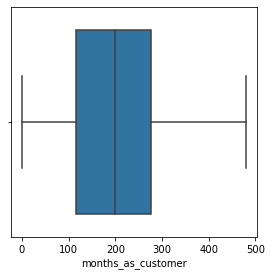

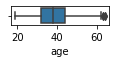

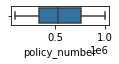

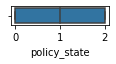

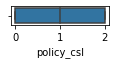

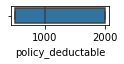

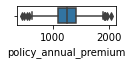

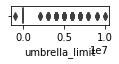

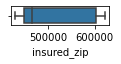

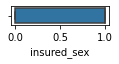

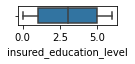

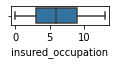

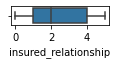

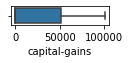

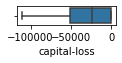

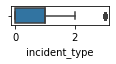

TypeError: Horizontal orientation requires numeric `x` variable.

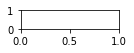

In [32]:
plt.figure(figsize=(15,50))
graph=1

for column in df_features:
    if graph<=30:
        ax=plt.subplot(10,3,graph)
        sns.boxplot(df_features[column],orient='v')
        plt.xlabel (column,fontsize=10)
        
        graph+=1
        
        plt.show()

In [34]:
data.shape

(1000, 34)

<AxesSubplot:>

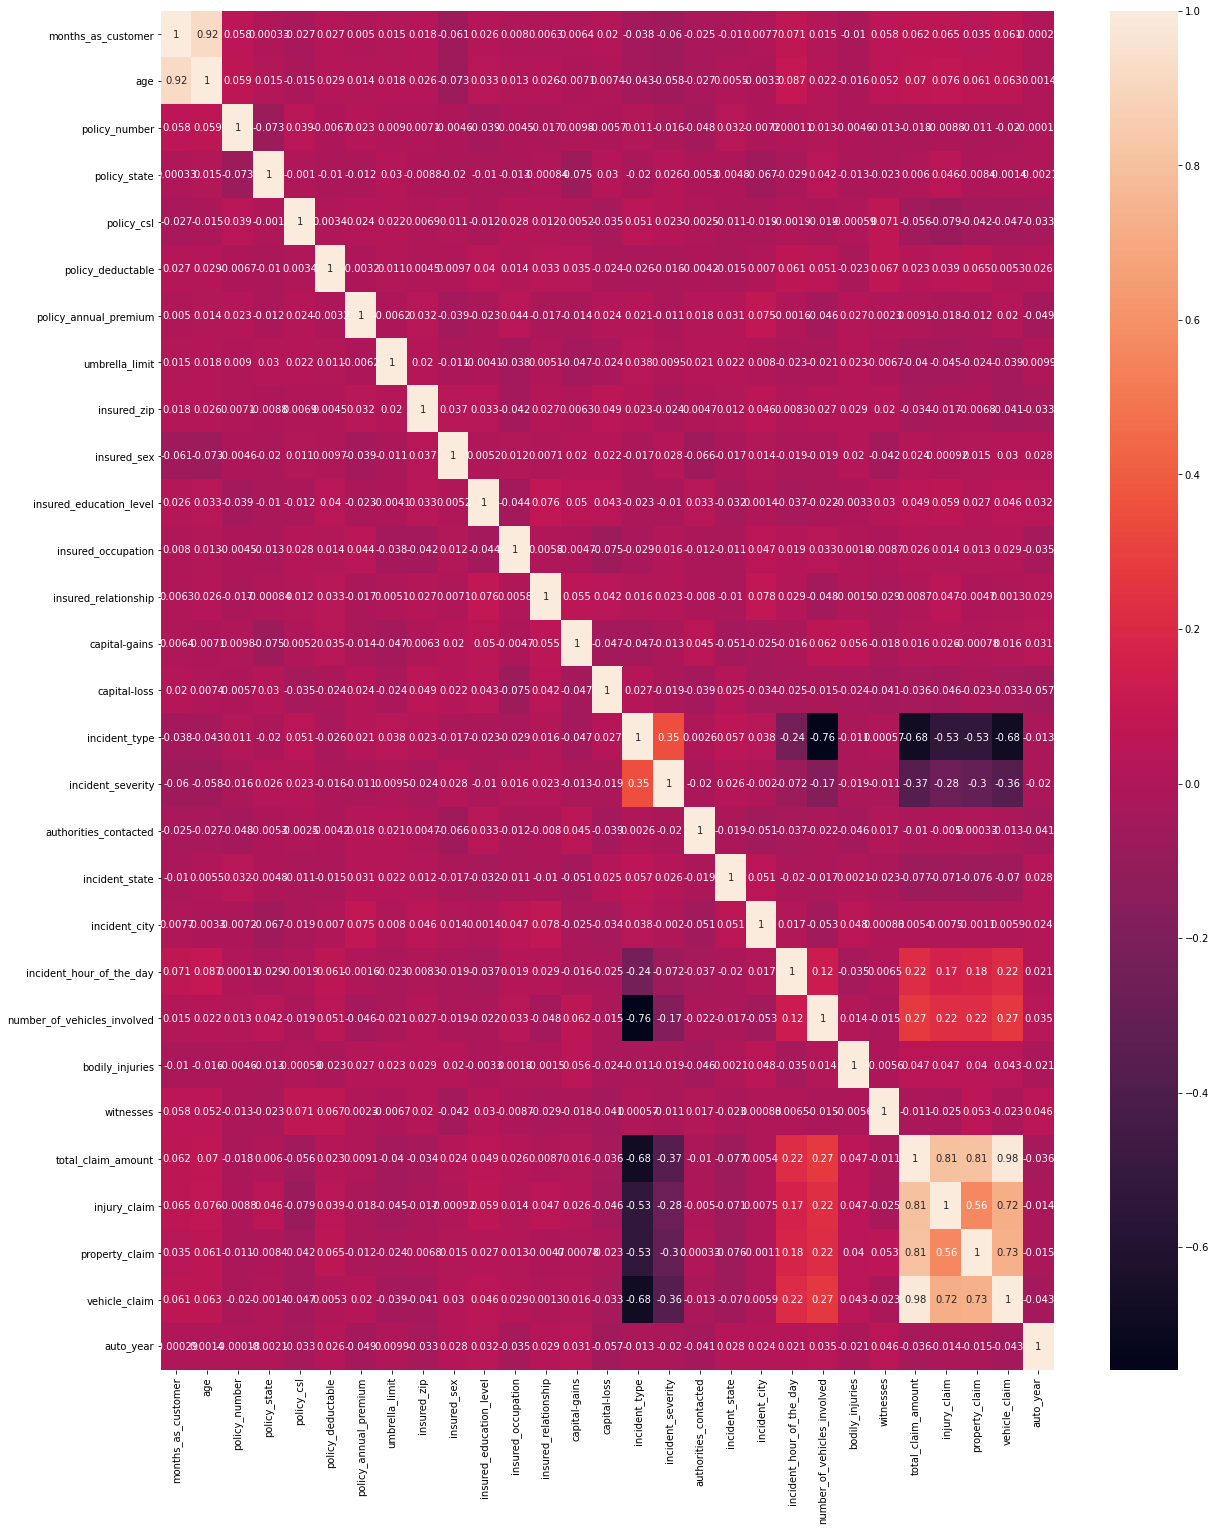

In [41]:
plt.figure(figsize=(20,25))
sns.heatmap(data.corr(), annot=True)

In [53]:
data=data.drop(columns=['property_damage'])

In [54]:
data=data.drop(columns=['police_report_available'])

In [55]:
x=data.drop(columns=['fraud_reported'])
y=data['fraud_reported']

ValueError: could not convert string to float: '?'

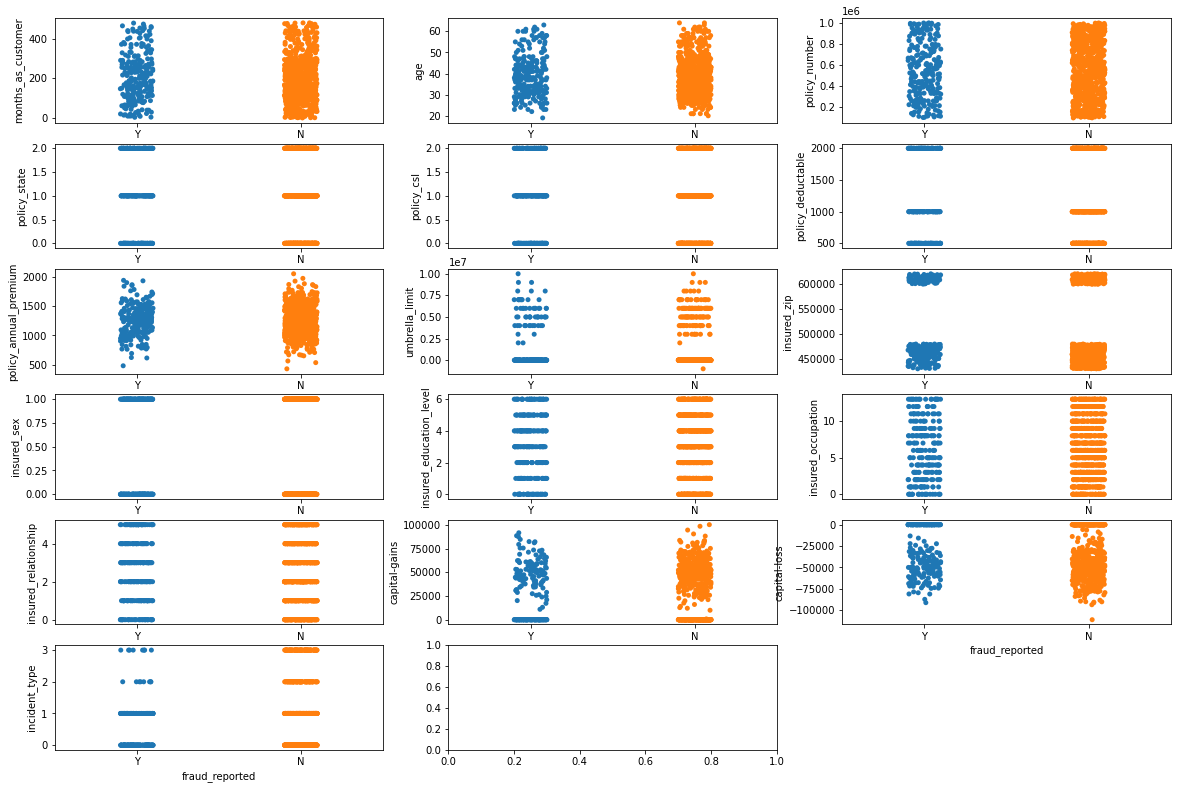

In [56]:
plt.figure(figsize=(20,25))

plotnumber=1

for column in x:
    if plotnumber<=33:
        ax=plt.subplot(11,3,plotnumber)
        sns.stripplot(y,x[column])
        
    plotnumber+=1
    
plt.show()

In [57]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

ValueError: could not convert string to float: '?'